In [1]:
setwd('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P10013.3. Data Visualization/Input')
Output = ('/Users/alexis/University of North Carolina at Chapel Hill/Rager, Julia - CEMALB_DataAnalysisPM/Projects/P1001. InVitroWildfire EVProteomics/P1001.3. Analyses/P10013.3. Data Visualization/Output')
cur_date = "030422"

library(readxl)
library(tidyverse)

#reading in file
pdf_data = data.frame(read_excel("Wildfire_InVitro_NTA_data_030421.xlsx")) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.0.6     ✔ dplyr   1.0.4
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
head(pdf_data)

,Sample.Identifier.NTA.PDF,Group.Label,Original.Concentration..Particles..mL.,Particle.Count,X10,X50,X90,Charge..mV.
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,20220201_0000_sample1_size,Co-culture unexposed,2.1e+09,1.05e+08,79.0,132.7,202.9,-8.18
2,20220201_0008_sample2_size,Co-culture unexposed,4.1e+09,2.05e+08,79.3,137.0,230.7,-19.40
3,20220201_0016_sample3_size,Co-culture unexposed,6.8e+09,3.40e+08,77.8,134.7,223.6,-21.55
4,20220201_0026_sample4_size,Co-culture unexposed,7.8e+09,3.90e+08,65.2,116.7,207.7,-5.71
5,20220202_0000_sample5_size,Co-culture unexposed,2.3e+09,1.15e+08,76.2,122.5,224.7,-24.52
6,20220202_0009_sample6_size,Co-culture unexposed,1.6e+10,8.00e+08,82.5,137.7,241.8,-27.16


In [7]:
#first calculating avg and std for visualization
longer_pdf_data = pdf_data %>% 
    #removing 2 values with missing group labels
    drop_na() %>%
    pivot_longer(cols = 3:8, names_to = "Variable", values_to = "Value") %>%
    group_by(Group.Label, Variable) %>%
    mutate(Avg = mean(Value), STD = sd(Value))

head(longer_pdf_data)

Sample.Identifier.NTA.PDF,Group.Label,Variable,Value,Avg,STD
<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
20220201_0000_sample1_size,Co-culture unexposed,Original.Concentration..Particles..mL.,2.100e+09,6.516667e+09,5.192077e+09
20220201_0000_sample1_size,Co-culture unexposed,Particle.Count,1.050e+08,3.258333e+08,2.596039e+08
20220201_0000_sample1_size,Co-culture unexposed,X10,7.900e+01,7.666667e+01,5.989880e+00
20220201_0000_sample1_size,Co-culture unexposed,X50,1.327e+02,1.302167e+02,8.608465e+00
20220201_0000_sample1_size,Co-culture unexposed,X90,2.029e+02,2.219000e+02,1.446942e+01
20220201_0000_sample1_size,Co-culture unexposed,Charge..mV.,-8.180e+00,-1.775333e+01,8.810107e+00


In [12]:
#removing sample identifiers and value cols to have distinct cols
final_df = longer_pdf_data %>%
    select(-c("Sample.Identifier.NTA.PDF", "Value")) %>%
    distinct()
head(final_df)

Group.Label,Variable,Avg,STD
<chr>,<chr>,<dbl>,<dbl>
Co-culture unexposed,Original.Concentration..Particles..mL.,6.516667e+09,5.192077e+09
Co-culture unexposed,Particle.Count,3.258333e+08,2.596039e+08
Co-culture unexposed,X10,7.666667e+01,5.989880e+00
Co-culture unexposed,X50,1.302167e+02,8.608465e+00
Co-culture unexposed,X90,2.219000e+02,1.446942e+01
Co-culture unexposed,Charge..mV.,-1.775333e+01,8.810107e+00


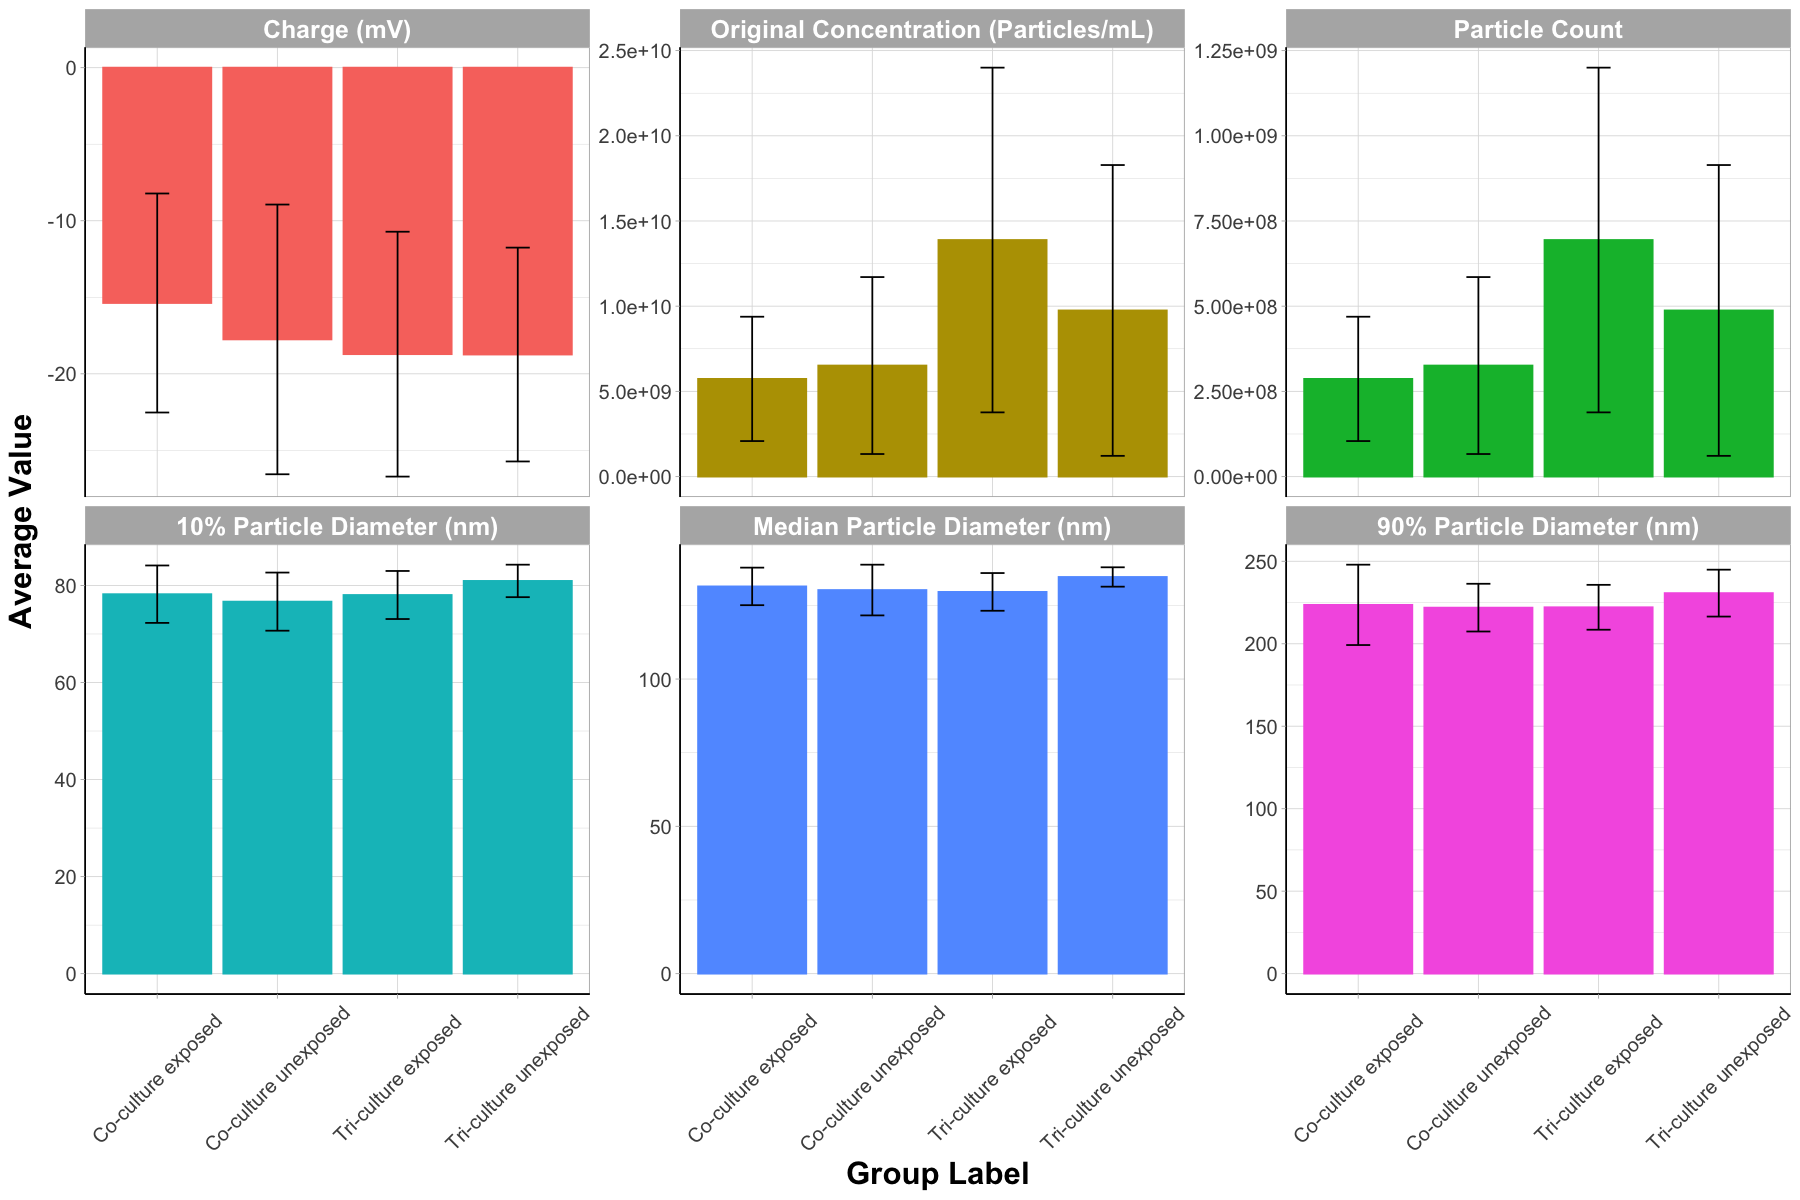

In [21]:
facet_names = as_labeller(c("Charge..mV." = "Charge (mV)", "Original.Concentration..Particles..mL." = "Original Concentration (Particles/mL)", 
                            "Particle.Count" = "Particle Count", "X10" = "10% Particle Diameter (nm)", "X50" = 
                "Median Particle Diameter (nm)", "X90" = "90% Particle Diameter (nm)"))
options(repr.plot.width=15, repr.plot.height=10) #changing size
ggplot() + 
  geom_col(data = final_df, aes(x = Group.Label, y = Avg, fill = Variable, color = Variable)) + 
  geom_errorbar(data = final_df, aes(x = Group.Label, y = Avg, ymin = Avg - STD, ymax = Avg + STD), 
                width = .2) +
  
  facet_wrap(~Variable, scales = "free_y", labeller = as_labeller(facet_names)) + 

  theme_light() + 
  theme(axis.text.x = element_text(angle = 45, vjust = 0.5), #rotating x labels/ moving x labels slightly to the left
        axis.line = element_line(colour = "black"), #making x and y axes black
        axis.text = element_text(size = 12), #changing size of x axis labels
        axis.title = element_text(face = "bold", size = rel(1.7)), #changes axis titles
        legend.position = "none",
        strip.text.x = element_text(size = 15, face = "bold"), #changes size of facet x axis 
        strip.text.y = element_text(size = 15, face = "bold")) + #changes size of facet y axis 
  xlab('Group Label') + ylab('Average Value')  #changing axis labels 